# Calculating Information Entropy after MNIST Dataset Prediction

## Loading Packages and Settings

In [1]:
import os
# # GPU Settings
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
import keras.backend as K

In [3]:
K.image_data_format() == "tf"
seed = 0
np.random.seed(seed)

## MNIST Dataset

### View Data Dimensions

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X Train Shape:", x_train.shape, "\nY Train Shape:", y_train.shape)
print("X Test  Shape:", x_test.shape, "\nY Test  Shape:", y_test.shape)

X Train Shape: (60000, 28, 28) 
Y Train Shape: (60000,)
X Test  Shape: (10000, 28, 28) 
Y Test  Shape: (10000,)


In [5]:
img_rows, img_cols = 28, 28
num_classes = 10

### View a Sample Data

(-0.5, 27.5, 27.5, -0.5)

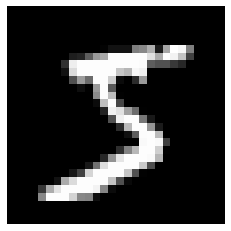

In [6]:
im = plt.imshow(x_train[0], cmap='gray')
plt.axis('off')

In [7]:
print("Y Label:", y_train[0])

Y Label: 5


### Reshape the Data

In [8]:
# Reshape to be samples * pixels * width * height
x_train = x_train.reshape(
    x_train.shape[0], img_rows, img_cols, 1
).astype('float32')
x_test = x_test.reshape(
    x_test.shape[0], img_rows, img_cols, 1
).astype('float32')
print("X Train Shape:", x_train.shape)
print("X Test  Shape:", x_test.shape)
print("DateType:", x_train.dtype)

X Train Shape: (60000, 28, 28, 1)
X Test  Shape: (10000, 28, 28, 1)
DateType: float32


### Data Normalization

In [9]:
print("Max Pixel Value:", np.max(x_train), "\nMin Pixel Value:", np.min(x_train))

Max Pixel Value: 255.0 
Min Pixel Value: 0.0


In [10]:
# Normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

### One-Hot Encode

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes)  # Converts a class vector (integers) to binary class matrix.
y_test = np_utils.to_categorical(y_test, num_classes)
print("Y Train Shape:", y_train.shape)
print("Y Test  Shape:", y_test.shape)

Y Train Shape: (60000, 10)
Y Test  Shape: (10000, 10)


In [12]:
print("One-Hot Sample:", y_train[0])

One-Hot Sample: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## LeNet1

### Define the Model

In [13]:
data_input_shape = (img_rows, img_cols, 1)

In [14]:
# Create model
model = Sequential(name="LeNet1")
model.add(Conv2D(
    32, (5, 5),
    input_shape=data_input_shape,
    activation='relu',
    padding="same",
    name="Input"
))
model.add(MaxPooling2D(
    pool_size=(2, 2), name="MaxPooling_1"
))
model.add(Conv2D(
    16, (3, 3), 
    activation='relu', 
    padding="same",
    name="Conv2D"
))
model.add(MaxPooling2D(
    pool_size=(2, 2), name="MaxPooling_2"
))
# model.add(Dropout(0.2, name="Dropout"))
model.add(Flatten(name="Flatten"))
# model.add(Dense(
#     128, activation='relu', name="Dense_1"
# ))
# model.add(Dense(
#     64, activation='relu', name="Dense_2"
# ))
model.add(Dense(
    num_classes, 
    activation='softmax', 
    name="Output"
))

In [15]:
model.summary()

Model: "LeNet1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
MaxPooling_1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D (Conv2D)              (None, 14, 14, 16)        4624      
_________________________________________________________________
MaxPooling_2 (MaxPooling2D)  (None, 7, 7, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                7850      
Total params: 13,306
Trainable params: 13,306
Non-trainable params: 0
________________________________________________________

### Training the Model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size = 256
epochs = 10
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.4878 - accuracy: 0.8581 - val_loss: 0.1397 - val_accuracy: 0.9574
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1235 - accuracy: 0.9637 - val_loss: 0.0949 - val_accuracy: 0.9704
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0740 - val_accuracy: 0.9773
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.0599 - val_accuracy: 0.9801
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0450 - val_accuracy: 0.9869
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0421 - val_accuracy: 0.9862
Epoch 

### Model Evaluation

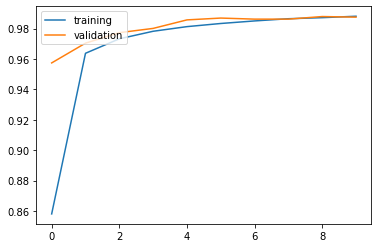

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')

In [19]:
evaluate = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9875


### Save the Model

In [20]:
model_dir = os.path.join(os.path.abspath('.'), "models")
model_name = "lenet1.h5"

In [21]:
if not os.path.exists(model_dir):
    # If models directory does not exist, create a directory
    os.makedirs(model_dir) 
    print("[INFO]", model_dir, "is Successfully Created!")

model.save(os.path.join(model_dir, model_name))
print("[INFO]", model_name,"Model File is Successfully Saved!")

[INFO] lenet1.h5 Model File is Successfully Saved!


## Priority Score

### Reload the Model

In [22]:
load_model = load_model(os.path.join(model_dir, model_name))

In [23]:
# load_model.summary()
evaluate = load_model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9875


### Calculate the Priority Score

In [24]:
def xi_score(idx, model, base):
    x_input = x_test[idx].reshape(-1, img_rows, img_cols, 1)
#     predict_label = model.predict_classes(x_input)[0]
    predict_list = model.predict(x_input)
    predict_label = np.argmax(predict_list, axis=-1)[0]

    x_score = - np.inner(
        predict_list[0],
        np.divide(np.log(predict_list)[0], np.log(base))
    )

    return predict_list[0], predict_label, x_score

### Define a Print Function

In [25]:
def xi_print(p_lst, p_class, r_class, score):

    col_name = ["Label", "Predict_Probability", "FCT"]
    col_len = [len(item) for item in col_name]
    total_len = sum(col_len) + 3 * len(col_len) - 1

    title = "Predict Table"

    print(title.center(len(title) + 2).center(total_len, "="))
    print('_' * total_len)
    print(
        "", col_name[0], 
        "|", col_name[1], 
        "|", col_name[2], ""
    )
    print(
        "", "-" * col_len[0], 
        "|", "-" * col_len[1], 
        "|", "-" * col_len[2], ""
    )

    pred_one_hot = np_utils.to_categorical(p_class, num_classes)

    for idx, item in zip(range(len(p_lst)), p_lst):
        print(
            "", str(idx).center(col_len[0]), "|", 
            "%.6e".rjust(col_len[1] - 8) % item, "|", 
            str("*" * int(pred_one_hot[idx])).center(col_len[2]), ""
        )

    print('=' * total_len)
    print(" Realistic Class :", r_class)
    print(" Predict Class   :", p_class)
    print(" Predict Validity:", p_class == r_class)
    print(" Priority Score  :", score)
    print('_' * total_len)

    return True

### Example

In [26]:
# For example
index = np.random.choice(range(y_test.shape[0]))
print("Index:", index)
p_list, p_label, x_score = xi_score(index, load_model, num_classes)
output = xi_print(p_list, p_label, np.argmax(y_test[index]), x_score)

Index: 2732
========== Predict Table ==========
___________________________________
 Label | Predict_Probability | FCT 
 ----- | ------------------- | --- 
   0   |        5.274189e-05 |     
   1   |        1.114570e-04 |     
   2   |        5.774447e-04 |     
   3   |        3.743485e-05 |     
   4   |        2.534379e-03 |     
   5   |        9.303457e-03 |     
   6   |        9.797384e-01 |  *  
   7   |        4.970524e-07 |     
   8   |        7.642747e-03 |     
   9   |        1.431681e-06 |     
 Realistic Class : 6
 Predict Class   : 6
 Predict Validity: True
 Priority Score  : 0.05307922
___________________________________



[Eg.001] Index.0235:


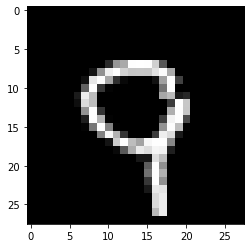

========== Predict Table ==========
___________________________________
 Label | Predict_Probability | FCT 
 ----- | ------------------- | --- 
   0   |        1.399855e-07 |     
   1   |        2.444683e-10 |     
   2   |        1.108734e-05 |     
   3   |        2.359467e-05 |     
   4   |        3.953693e-05 |     
   5   |        5.933935e-05 |     
   6   |        2.404474e-10 |     
   7   |        4.111004e-02 |     
   8   |        8.956100e-04 |     
   9   |        9.578607e-01 |  *  
 Realistic Class : 9
 Predict Class   : 9
 Predict Validity: True
 Priority Score  : 0.07821008
___________________________________

Quit for the Example? yes/[No]: yes


In [27]:
key_in = ""
seed = 0
quit_input = ["y", "yes"]
while key_in.lower() not in quit_input:
    seed += 1
    np.random.seed(seed)
    index = np.random.choice(range(y_test.shape[0]))
    print(
        "\n[Eg." + str(seed).rjust(3, "0") + \
        "] Index." + str(index).rjust(4, "0") + ":"
    )
    im = plt.imshow(x_test[index].reshape(img_rows, img_cols), cmap='gray')
    plt.show()

    p_list, p_label, x_score = xi_score(index, load_model, num_classes)
    output = xi_print(p_list, p_label, np.argmax(y_test[index]), x_score)

    if output:
        time.sleep(1)
        key_in = input("\nQuit for the Example? yes/[No]: ")
    else:
        break